<a href="https://colab.research.google.com/github/selenophile2005/SMS-Spam-detector-using-machine-learning-/blob/main/SMS_spam_detection_using_machine_learning_ipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

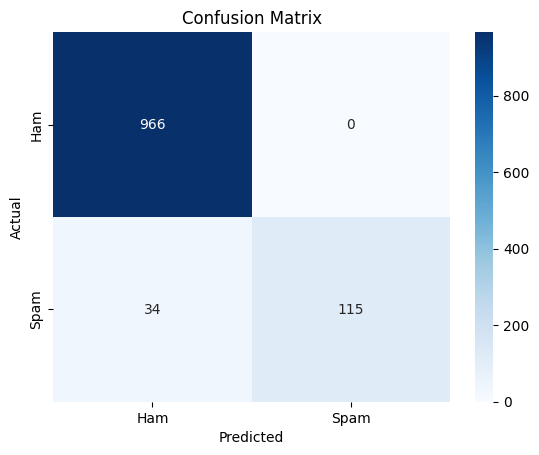

Classification Report:

              precision    recall  f1-score   support

         Ham       0.97      1.00      0.98       966
        Spam       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



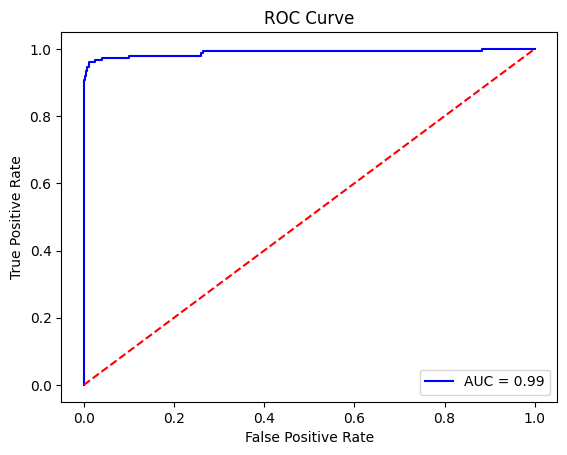

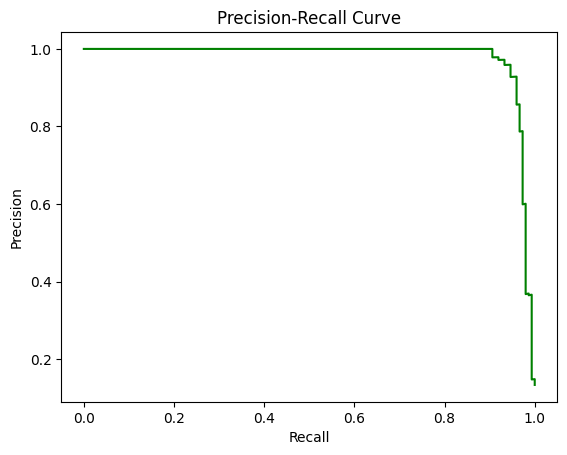

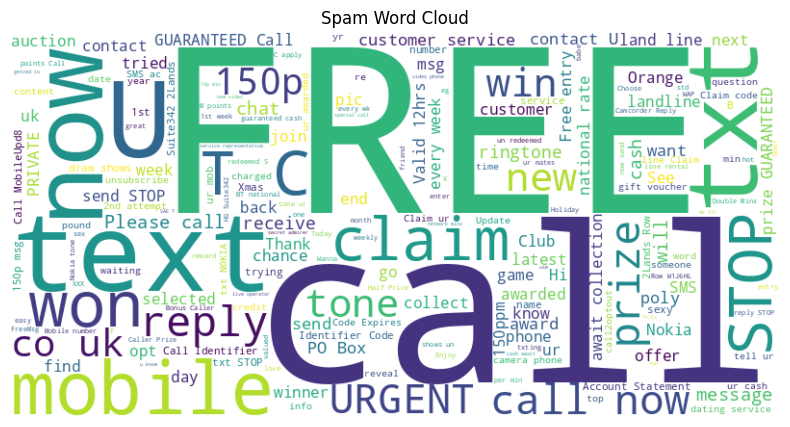

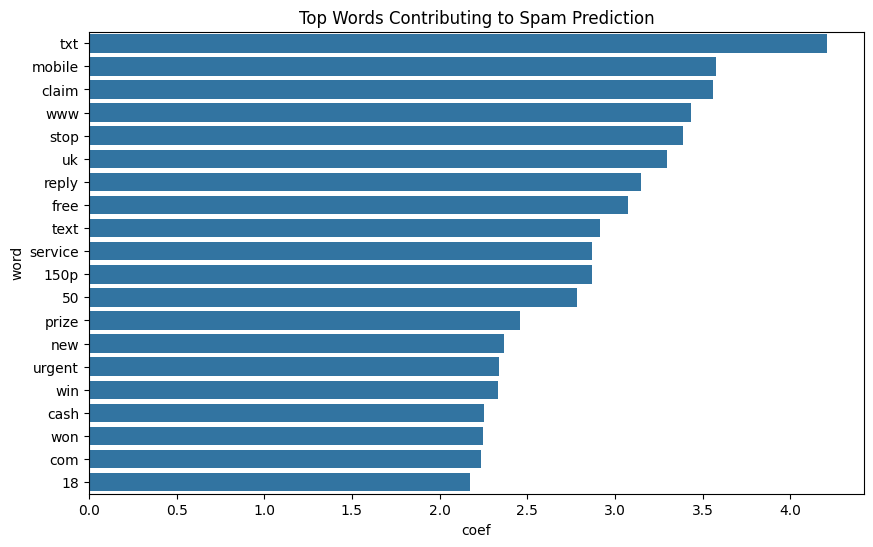

Ham


In [1]:
# SMS Spam Detector with Evaluation and Visualization

# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from wordcloud import WordCloud

# 2. Load dataset
# Example: SMS Spam Collection Dataset (UCI)
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label','message'])

# Encode labels: ham=0, spam=1
df['label_num'] = df['label'].map({'ham':0, 'spam':1})

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label_num'], test_size=0.2, random_state=42)

# 4. Text vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 5. Train classifier
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# 6. Predictions
y_pred = model.predict(X_test_vec)
y_prob = model.predict_proba(X_test_vec)[:,1]  # probabilities for ROC/PR curves

# 7. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 8. Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Ham','Spam']))

# 9. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', label='AUC = %.2f' % roc_auc)
plt.plot([0,1],[0,1], color='red', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# 10. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.plot(recall, precision, color='green')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# 11. Word Cloud for Spam messages
spam_text = " ".join(df[df['label']=='spam']['message'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Spam Word Cloud")
plt.show()

# 12. Feature Importances (top words)
coef = model.coef_[0]
feature_names = vectorizer.get_feature_names_out()
top_spam = pd.DataFrame({'word': feature_names, 'coef': coef}).sort_values(by='coef', ascending=False).head(20)
plt.figure(figsize=(10,6))
sns.barplot(x='coef', y='word', data=top_spam)
plt.title("Top Words Contributing to Spam Prediction")
plt.show()

# 13. Simple UI (input text)
def predict_sms(text):
    vec = vectorizer.transform([text])
    pred = model.predict(vec)[0]
    return "Spam" if pred==1 else "Ham"

# Example usage
print(predict_sms("Congratulations! You have won a $1000 gift card."))